In [83]:
from typing import Callable, Tuple

import matplotlib.pyplot as plt
import numpy as np

# Declaração de Métodos

In [90]:
Ponto = Tuple[float, float]
Intervalo = Tuple[float, float]
Fx = Callable[[float], float]
Fxy = Callable[[float, float], float]
Passo = Callable[[Ponto, float, float], float]

In [86]:
def met_secante(
        f: Fx,
        x0: float, x1: float,
        tol: float = 1.0e-5,
        max_iter: int = 1000):
    for _ in range(max_iter):
        dfdx = (x1 - x0)/(f(x1) - f(x0))
        new_x = x1 - f(x1) * dfdx
        estimate = f(new_x)
        if np.abs(estimate) < tol:
            return new_x
        
        x0 = x1
        x1 = new_x
    return None

assert np.isclose(met_secante(
    lambda x: x ** 2 - 3 * x,
    3.5, 4.1,
    1.0e-5,
), 3.0)
assert np.isclose(met_secante(
    lambda x: x ** 2 - 3 * x,
    -0.6, 1.2,
    1.0e-5,
), 0.0)

In [88]:
def euler_explicito(
        dy: Fxy,
        h: float,
        xrange: Intervalo,
        p0: Ponto,
):
    (a, b) = xrange
    x = np.arange(a, b + h, h)
    y = np.zeros_like(x)
    (x[0], y[0]) = p0
    for i in range(len(x) - 1):
        y[i + 1] = y[i] + h * dy(x[i], y[i])
    return (x, y)

In [91]:
def passo_manual(
        step: Passo,
        h: float,
        xrange: Intervalo,
        p0: Ponto,
):
    (a, b) = xrange
    x = np.arange(a, b + h, h)
    y = np.zeros_like(x)
    (x[0], y[0]) = p0
    for i in range(len(x) - 1):
        y[i + 1] = step((x[i], y[i]), x[i + 1], h)
    return (x, y)

In [92]:
def ponto_medio(
        dy: Fxy,
        h: float,
        xrange: Intervalo,
        p0: Ponto):
    (a, b) = xrange
    x = np.arange(a, b + h, h)
    y = np.zeros_like(x)
    (x[0], y[0]) = p0
    for i in range(len(x) - 1):
        at_point = dy(x[i], y[i])
        y[i + 1] = y[i] + h * dy(x[i] + h / 2, y[i] + h/2 * at_point)
    return (x, y)

In [93]:
def metodo_trapezios(
        dy: Fxy,
        h: float,
        xrange: Intervalo,
        p0: Ponto):
    (a, b) = xrange
    x = np.arange(a, b + h, h)
    y = np.zeros_like(x)
    (x[0], y[0]) = p0
    for i in range(len(x) - 1):
        y[i + 1] = met_secante(
            lambda y_next: y[i] + h/2 * (dy(x[i], y[i]) + dy(x[i + 1], y_next)) - y_next,
            y[i] if i == 0 else y[i - 1],
            y[i] + 0.5 if i == 0 else y[i] 
        )
    return (x, y)

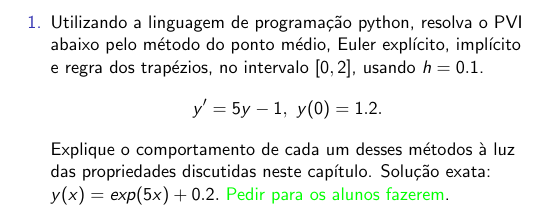

Para o Euler Implícito, o passo será dado por:

$$ y_{i + 1} = y_i + h f(x_{i + 1}, y_{i + 1}) $$
$$ y_{i + 1} = y_i + h (5 y_{i + 1} - 1) $$
$$ y_{i + 1} = y_i + 5hy_{i + 1} - h $$
$$ (1 - 5h)y_{i + 1} = y_i - h $$
$$ y_{i + 1} = \frac{y_i - h}{1 - 5h} $$

In [94]:
params = {
    "dy": lambda x, y: 5 * y - 1,
    "h": 0.1,
    "xrange": (0, 2),
    "p0": (0, 1.2),
}

res_pm = ponto_medio(**params)
res_ee = euler_explicito(**params)
def fn_passo_manual(
        p_i: tuple[float, float], # xi, yi
        xip1: float, # x_{i + 1}
        h: float):
    (_, yi) = p_i
    return (yi - h)/(1 - 5 * h)

res_ei = passo_manual(
    step=fn_passo_manual,
    h=params["h"],
    xrange=params["xrange"],
    p0=params["p0"],
)
res_rt = metodo_trapezios(**params)
ex_f = lambda x: np.exp(5 * x) + 0.2
res_ex = (
    res_pm[0],
    ex_f(res_pm[0]),
)
res = {
    "Ponto Médio": res_pm,
    "Euler Explícito": res_ee,
    "Euler Implícito": res_ei,
    "Regra dos Trapézios": res_rt,
    "Exata": res_ex
}

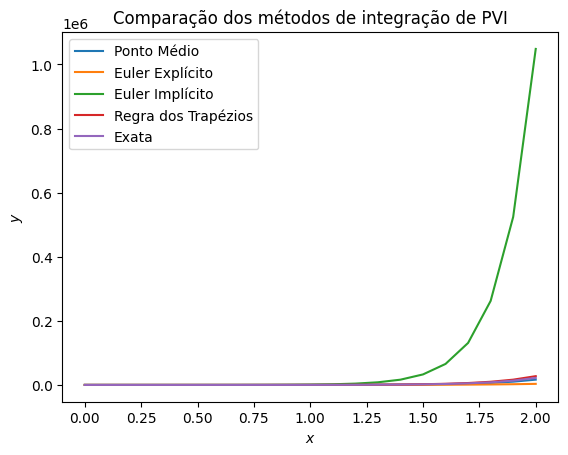

In [95]:
for k, (x, y) in res.items():
    plt.plot(x, y, label=k)
plt.legend()
plt.title("Comparação dos métodos de integração de PVI")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

O método de Euler Implícito obteve valores muito altos, dificultando a visualização. Primeiro, iremos visualizar o mesmo resultado em escala logarítmica, depois, recalcularemos com $h=0.05$:

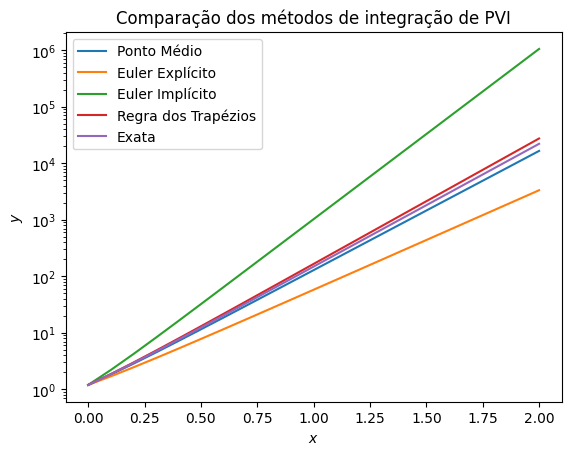

In [96]:
for k, (x, y) in res.items():
    plt.plot(x, y, label=k)
plt.legend()
plt.title("Comparação dos métodos de integração de PVI")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.yscale("log")
plt.show()

In [97]:
params["h"] = 0.05

res_pm = ponto_medio(**params)
res_ee = euler_explicito(**params)
def fn_passo_manual(
        p_i: tuple[float, float], # xi, yi
        xip1: float, # x_{i + 1}
        h: float):
    (_, yi) = p_i
    return (yi - h)/(1 - 5 * h)

res_ei = passo_manual(
    step=fn_passo_manual,
    h=params["h"],
    xrange=params["xrange"],
    p0=params["p0"],
)
res_rt = metodo_trapezios(**params)
ex_f = lambda x: np.exp(5 * x) + 0.2
res_ex = (
    res_pm[0],
    ex_f(res_pm[0]),
)
res = {
    "Ponto Médio": res_pm,
    "Euler Explícito": res_ee,
    "Euler Implícito": res_ei,
    "Regra dos Trapézios": res_rt,
    "Exata": res_ex
}

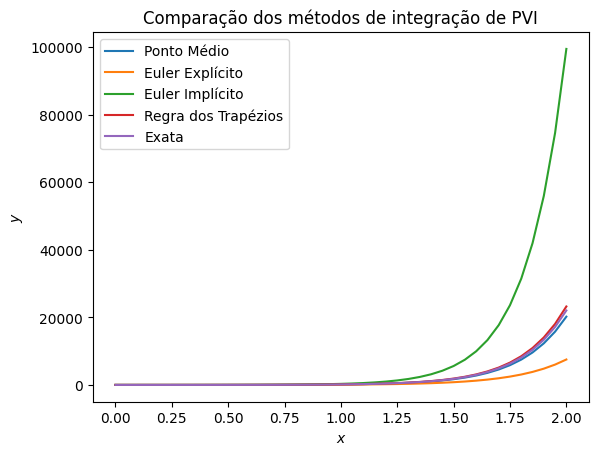

In [98]:
for k, (x, y) in res.items():
    plt.plot(x, y, label=k)
plt.legend()
plt.title("Comparação dos métodos de integração de PVI")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

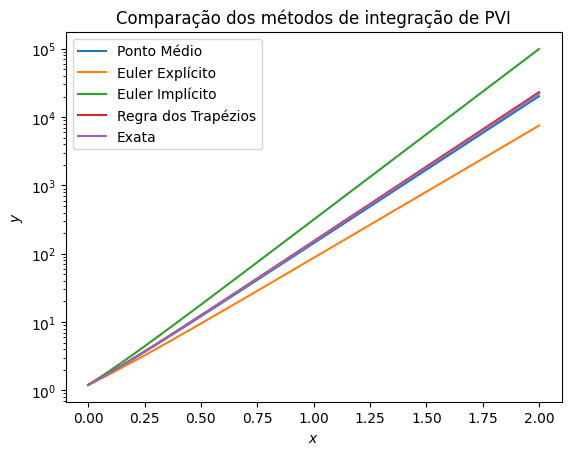

In [99]:
for k, (x, y) in res.items():
    plt.plot(x, y, label=k)
plt.legend()
plt.title("Comparação dos métodos de integração de PVI")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.yscale("log")
plt.show()

Portanto, a tendência de cada método é:
- **Ponto Médio** e **Método dos Trapézios**: obtêm melhores aproximações, esperado devido a ordem de convergência.
- **Euler Explícito**: tende a _subestimar_ o resultado.
- **Euler Implícito**: tende a _superestimar_ o resultado.

Isso fica óbvio quando utilizando a escala em base logarítmica.